# COMP5318 - Machine Learning and Data Mining 

## Tutorial 3 - Linear regression and Gradient Decent

**Semester 2, 2019**

**Objectives:**
* To learn how to build a linear regression model from scratch
* To learn about Gradient decent
* To learn how to use pandas and numpy to preprocess data.

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab3.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab3.ipynb" file
* Complete exercises in "lab3.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Nguyen Hoang Tran 

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran

## 1. House Prices Dataset
**Dataset descriptions:**
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("./data"))

['data_description.txt', 'test.csv', 'train.csv']


In [2]:
#Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('./data/train.csv')
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### In this tutorial we only consider one feature the Living Area to predict the Sale Price with the expectation that the Price will increase when the Living Area increases.
However we can use more features like the number of bedroom....

In [3]:
newData = data[['GrLivArea','SalePrice']]
print(newData.head())

   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000


Plot the dataset on firgure

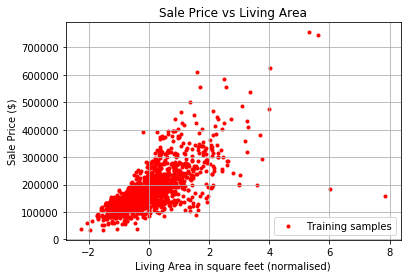

In [4]:
import matplotlib.pylab as pl
%matplotlib inline
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = newData['GrLivArea']
y = newData['SalePrice']
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 
pl.scatter(x[:,1], y,marker='.', color = 'r', label = 'Training samples')
pl.xlabel('Living Area in square feet (normalised)')
pl.ylabel('Sale Price ($)')
pl.legend(loc='lower right')
plt.title('Sale Price vs Living Area')
pl.grid()
pl.show()

### 2. Building Linear Regression model using Gradient Decent with sum square error

#### 2.1 Linear Model:
* input: $x \in R^D$ (covariates, predictors, features, etc)
* Output: $y \in R$ (responses, targets, outcomes, outputs, etc)
* Model: $f: x \to y$,with $f(x)=w_0+ \
\sum_{d=1}^{D}w_dx_d =w_0+w^T x.$

Minimize the Residual sum of squares:
$ RSS(w) = \sum_{n=1}^{N}[y_n-f(x_n)]^2 =  \sum_{n=1}^{N}[y_n- (w_0 + \sum_{d=1}^{D}w_dx_{nd}) ]^2 .$

#### 2.2 Gradient decent:
* Initialize $w =  w^{(0)}$ randomly:
* Choose learning rate $ \eta> 0$
*  Loop until convergence:

    Compute Gradient: $\nabla RSS(w) = X^T(Xw^t-y)$
    
    Update parameters: $w^{t+1} = w^t - \frac{1}{n}\eta * \nabla RSS(w)$

In [5]:
#GRADIENT DESCENT
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        loss = 1/(2*n) * np.dot(error.T, error)
        past_loss.append(loss)
        
        GradRss = np.dot(x.T, error)
        w = w - (eta * (1/n) * GradRss)
        past_w.append(w)
        
    return past_w, past_loss

In [6]:
#Pass the relevant variables to the function and get the new values back...
eta = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
w0 = np.random.rand(2) #Pick some random values to start with

past_w, past_loss = gradient_descent(x, y, w0, iterations, eta)

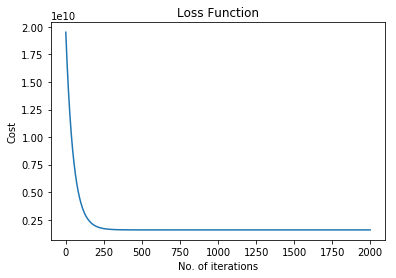

In [7]:
#Plot the cost function...
plt.title('Loss Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_loss)
plt.show()

In [8]:
print(past_w[-1])

[180921.19555322  56294.90199925]


### 3. The changing of model through each interation

In [9]:
#Animation
#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_w[i][1]*x + past_w[i][0]
    line.set_data(x, y)
    annotation.set_text('loss = %.2f e10' % (past_loss[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable. Trying to use pillow instead.



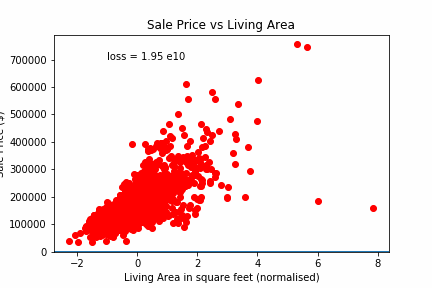

In [10]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### 4: Using more features to predict the house price.

In [97]:
#For example using LotFrontage, and GrLivArea
dataNew = data[["GrLivArea","LotFrontage",'SalePrice']]

#remove null value
dataNew = dataNew[dataNew['GrLivArea'].notnull()]
dataNew = dataNew[dataNew['LotFrontage'].notnull()]

x = dataNew[["GrLivArea","LotFrontage"]]
y = dataNew['SalePrice']

In [94]:
x_1 = x["GrLivArea"]
x_2 = x["LotFrontage"]
x_1 = (x_1 - x_1.mean()) / x_1.std()
x_2 = (x_2 - x_2.mean()) / x_2.std()
df = list(zip(x_1, x_2))
x = pd.DataFrame(df)
x = np.c_[np.ones(x.shape[0]), x] 

In [95]:
#Pass the relevant variables to the function and get the new values back...
eta = 0.01 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
w0 = np.random.rand(3) #Pick some random values to start with
past_w, past_loss = gradient_descent(x, y, w0, iterations, eta)

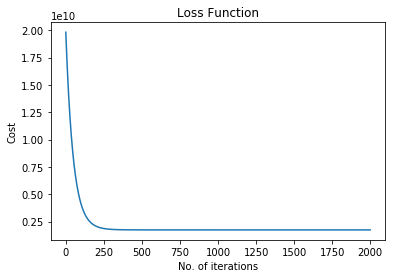

In [96]:
#Plot the cost function...
plt.title('Loss Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_loss)
plt.show()